# Image Coverage vs Container Counts

In [1]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [2]:
province = 'krabi'
province2 = 'Krabi'

In [3]:
data = pd.read_csv(os.path.join('Data','Scatter','ImageCount_'+province+'.csv'), index_col = 0)
data.columns = ['addrcode','Image Coverage [%]','Container Counts']
data.head()

,addrcode,Image Coverage [%],Container Counts
0,810103,9.72,1039
1,810105,3.75,76
2,810106,3.66,396
3,810111,2.42,146
4,810115,7.16,339


Text(0.5,1,'Image Coverage vs Container Counts in Krabi')

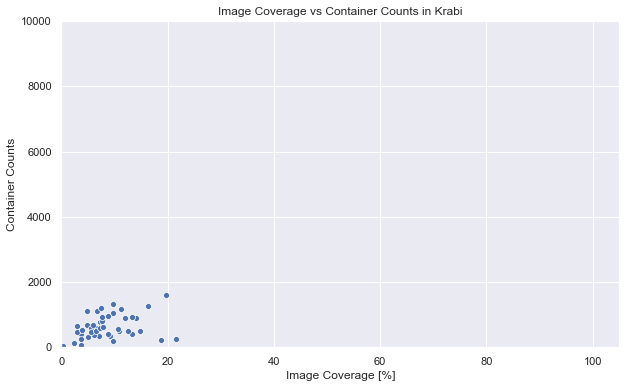

In [4]:
ax = plt.subplots(figsize=(10,6))
ax = sns.scatterplot(x="Image Coverage [%]", y="Container Counts", data=data)
ax.set(ylim=(0, 10000), xlim=(0,105))
ax.set_title("Image Coverage vs Container Counts in " + province2)


# Population vs Container Counts

In [20]:
data = pd.read_csv(os.path.join('Data','Scatter','PopCount.csv'), index_col = 0)
data['addrcode'] = data['addrcode'].astype(str)
data.columns = ['addrcode','Population','Container Counts','Pop Density']
list = []
for i in range(len(data)):
    if data['addrcode'][i][:2] == '10':
        list.append('Bangkok')
    elif data['addrcode'][i][:2] == '80':
        list.append('NST')
    elif data['addrcode'][i][:2] == '81':
        list.append('Krabi')
data['Province'] = list
data.head()

,addrcode,Population,Container Counts,Pop Density,Province
0,1001,50708,2527,1018.028508,Bangkok
1,1002,91338,1158,1721.085359,Bangkok
2,1003,166831,7432,83.232389,Bangkok
3,1004,37675,1956,1011.137950,Bangkok
4,1005,187466,14879,492.631524,Bangkok


In [21]:
#data['Pop Density'] = data['Pop Density']/(data['Pop Density'].max())

In [22]:
# data_nst = data.loc[data['Province'] == 'NST']
# data_nst

Text(0.5,1,'Population vs Container Counts')

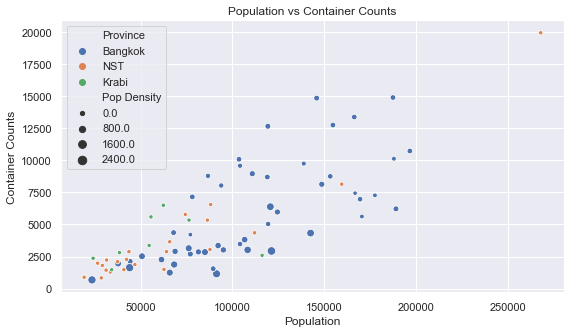

In [34]:
ax = plt.subplots(figsize=(9,5))
# markersize = 0.2* data['Pop Density']
kws = dict(s=100, linewidth=.5, edgecolor="w")
ax = sns.scatterplot(x="Population" ,y="Container Counts" ,hue = "Province" ,size = 'Pop Density', data=data)
ax.set_title("Population vs Container Counts")
# ax.set(ylim=(0, 16000), xlim=(0,200000))

# Larval Survey

In [196]:
df_larval = pd.read_csv(os.path.join('Data','Larval Survey','larval-survey.csv'))
df_larval['addrcode'] = df_larval['addrcode'].astype(str).str[:6]
df_larval.head()

,addrcode,date,hi,ci,bi
0,810405,2017-06-01,22.5,6.47,22.5
1,810405,2017-06-01,15.0,4.52,17.5
2,800409,2017-06-01,17.0,3.18,17.0
3,800904,2017-06-01,25.0,4.51,27.5
4,800912,2017-06-01,15.0,8.95,42.5


In [197]:
scope = ['80']
df_larval = df_larval.loc[df_larval['addrcode'].str[:2] == scope[0]]
df_larval.head()

,addrcode,date,hi,ci,bi
2,800409,2017-06-01,17.0,3.18,17.0
3,800904,2017-06-01,25.0,4.51,27.5
4,800912,2017-06-01,15.0,8.95,42.5
5,800903,2017-06-01,17.5,3.93,22.5
6,801104,2017-06-01,26.0,4.28,26.0


In [198]:
df_larval['Year'] = pd.DatetimeIndex(df_larval['date']).year
df_larval['Month'] = pd.DatetimeIndex(df_larval['date']).month
#df_larval = df_larval[['addrcode','date','Month','Year','hi','ci','bi']].drop('date',axis = 1)
df_larval['Year'] = df_larval['Year'].astype(str)
df_larval['Month'] = df_larval['Month'].astype(str)
df_larval = df_larval.groupby([df_larval['addrcode'].str[:4], df_larval['Year'], df_larval['Month']]).sum().reset_index()

df_larval.head()

,addrcode,Year,Month,hi,ci,bi
0,8001,2011,12,0.0,0.00,0.0
1,8001,2011,5,5.0,0.77,6.0
2,8001,2011,8,5.0,0.83,6.0
3,8001,2012,2,18.0,3.65,53.0
4,8001,2012,5,11.0,3.63,38.0


In [199]:
list = ['2011','2012','2013','2014']
for i in range(len(list)):
    df_larval = df_larval[df_larval.Year != list[i]]

In [200]:
# df_survey = pd.read_csv(os.path.join('Data','Larval Survey','larval-survey.csv')) 
# df_survey = df_survey.replace(0, np.nan) 
# df_survey = df_survey.dropna(axis=0, how='any') 
# df_survey = df_survey.reset_index(drop=True) 
# df_survey['addrcode'] = df_survey['addrcode'].astype('int') 
# df_survey['date'] = pd.to_datetime(df_survey['date'], format='%Y-%m') 
# df_survey = df_survey.set_index('date') 
# df_survey = df_survey.sort_index() 
# df_survey = df_survey['2015':'2017'] 
# # df_survey = query.filter_survey(df_survey, index=‘bi’) 
# print('Before:',len(df_survey[df_survey['addrcode']==800404])) 

# index='bi'
# df_filtered = [] 
# for addrcode in df_survey['addrcode'].unique(): 
#     tmp = df_survey.loc[df_survey['addrcode'] == addrcode].copy() 
#     if len(tmp) == 1 and tmp[index].mean() < 100: 
#         df_filtered.append(tmp.copy()) 
#     df_filtered.append(tmp[np.abs(tmp[index]-tmp[index].mean()) <= (1*tmp[index].std())].copy()) 
# df_filtered = pd.concat(df_filtered, axis=0) 
# print('After:',len(df_filtered[df_filtered['addrcode']==800404]))


In [201]:
df_larval_2015 = df_larval.loc[df_larval['Year'] == '2015']
df_larval_2016 = df_larval.loc[df_larval['Year'] == '2016']
df_larval_2017 = df_larval.loc[df_larval['Year'] == '2017']
df_larval_2015['Month'] = df_larval_2015['Month'].astype(int)
df_larval_2015 = df_larval_2015.sort_values('Month')
df_larval_2016['Month'] = df_larval_2016['Month'].astype(int)
df_larval_2016 = df_larval_2016.sort_values('Month')
df_larval_2017['Month'] = df_larval_2017['Month'].astype(int)
df_larval_2017 = df_larval_2017.sort_values('Month')
df_larval_2015.head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

,addrcode,Year,Month,hi,ci,bi
318,8020,2015,2,13.0,3.76,13.0
224,8013,2015,2,24.0,6.32,62.0
170,8009,2015,2,29.0,7.81,41.0
333,8022,2015,2,16.0,2.06,20.0
145,8008,2015,2,21.0,3.95,21.0


Text(0.5,1,'Breteau Index Scatter plot')

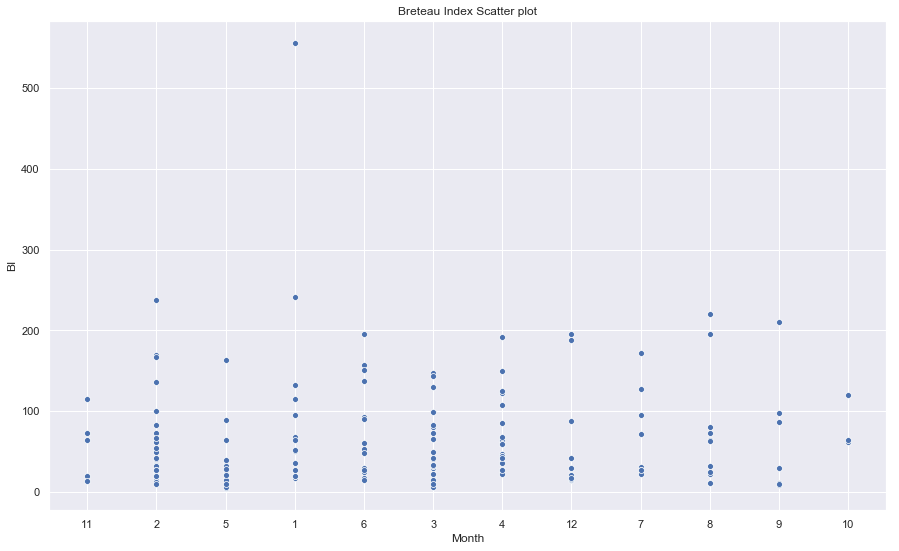

In [202]:
df_larval.columns = ['addrcode','Year','Month','HI','CI','BI']
ax = plt.subplots(figsize=(15,9))
ax = sns.scatterplot(x="Month" ,y="BI" , data=df_larval)
ax.set_title("Breteau Index Scatter plot")

Text(0.5,1,'Breteau Index Scatter plot')

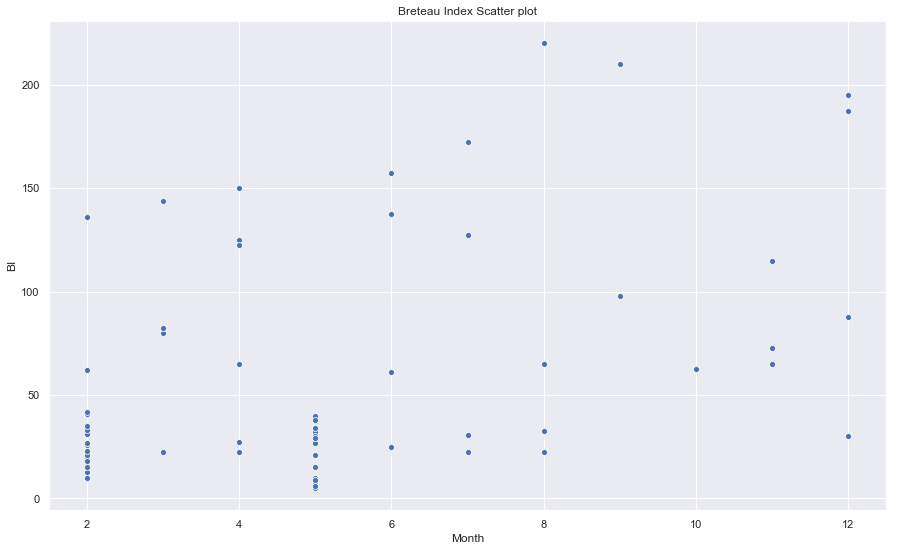

In [203]:
df_larval_2015.columns = ['addrcode','Year','Month','HI','CI','BI']
ax = plt.subplots(figsize=(15,9))
ax = sns.scatterplot(x="Month" ,y="BI" , data=df_larval_2015)
ax.set_title("Breteau Index Scatter plot")

Text(0.5,1,'Breteau Index Scatter plot')

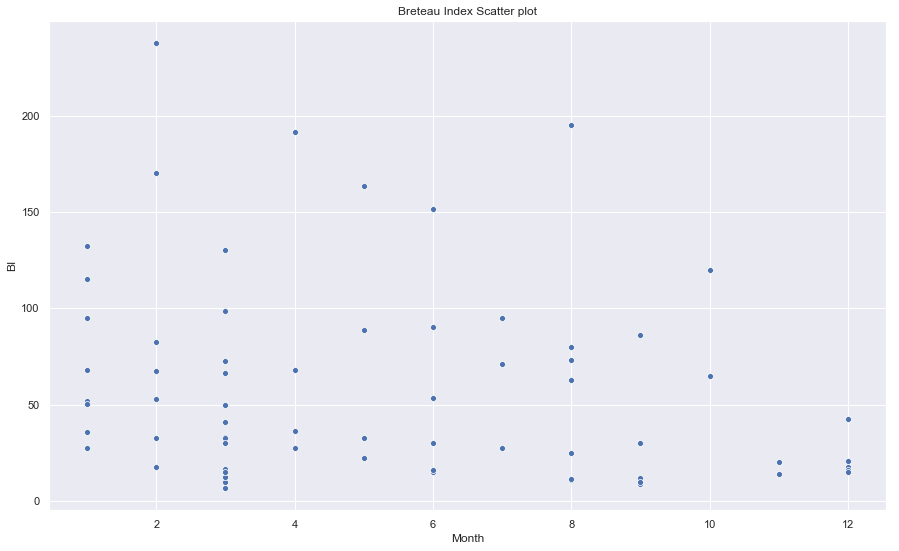

In [204]:
df_larval_2016.columns = ['addrcode','Year','Month','HI','CI','BI']
ax = plt.subplots(figsize=(15,9))
ax = sns.scatterplot(x="Month" ,y="BI" , data=df_larval_2016)
ax.set_title("Breteau Index Scatter plot")

Text(0.5,1,'Breteau Index Scatter plot')

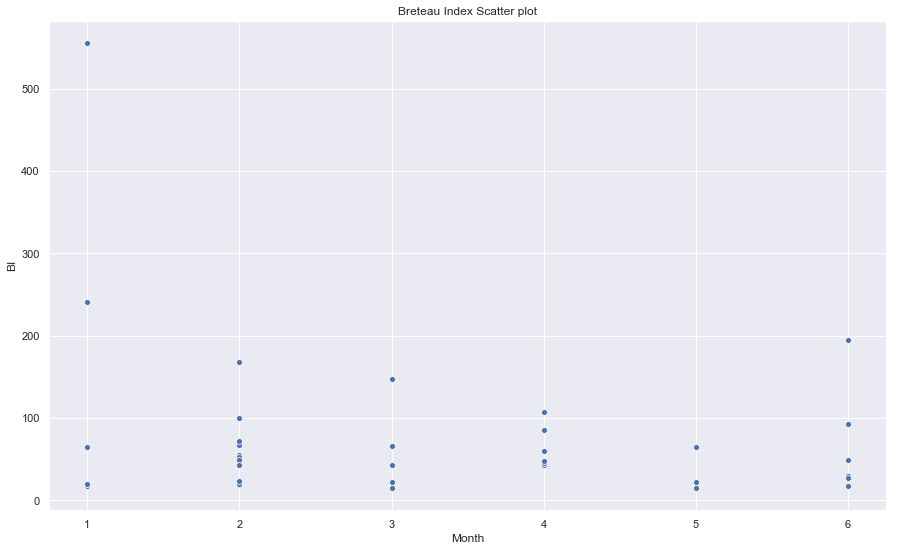

In [205]:
df_larval_2017.columns = ['addrcode','Year','Month','HI','CI','BI']
ax = plt.subplots(figsize=(15,9))
ax = sns.scatterplot(x="Month" ,y="BI" , data=df_larval_2017)
ax.set_title("Breteau Index Scatter plot")